# Animal Image Dataset(DOG, CAT and PANDA)

## Dataset

https://www.kaggle.com/datasets/ashishsaxena2209/animal-image-datasetdog-cat-and-panda

[Image]
* cats: "cats_0001.jpg ~ cats_1000.jpg" (1,000)
* dogs: "dogs_0001.jpg ~ dogs_1000.jpg" (1,000)
* panda: "panda_0001.jpg ~ panda_1000.jpg" (1,000)

In [1]:
!ls

'0901_pima_TF_classification_input_ipynb의_사본 (1).ipynb'
'0902-pima-TF-regression-input (1).ipynb'
'1002-malaria-cnn-basic-input (1) (1).ipynb'
'1003-malaria-vgg-resnet-input (1).ipynb'
 1005-weather-transfer-learning-input.ipynb
 Animal_Image_64.csv
 Animal_Image_Classification_Model1_0.75.ipynb
 Animal_Images_Classification_model_.ipynb
'CNN_ Animal_Image.ipynb'
 DO_NOT_STORE_PERSISTENT_FILES_HERE.md
 Digit_Recognizer.ipynb
 The_Number_of_Cinema_Audiences.ipynb
 Training_checkpoint
 animals
 archive.zip
 archive_animals.zip
 cell_images
 cell_images.zip
 cnn_mnist_datagen.csv
 digit-recognizer.zip
 feLightGBM.csv
 gslgbm.csv
 id_container
 images
 kfoldLightGBM.csv
 movies_test.csv
 movies_train.csv
 sample_submission.csv
 singleLGBM.csv
 submission.csv
 test.csv
 train.csv
 wimages
 영화관객수.zip


### Library Load

In [21]:
# 상용 라이브러리
from glob import glob
import pandas as pd
import numpy as np
import cv2

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from skimage.transform import resize  # 이미지 크기 조정

# Tensorflow 라이브러리
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping



### Data Load

In [15]:
# glob function jpg file Loading
cat_flist = sorted(glob("animals/cats/*.jpg"))
dog_flist = sorted(glob("animals/dogs/*.jpg"))
panda_flist = sorted(glob("animals/panda/*.jpg"))

print("cat_flist: ", len(cat_flist))
print("dog_flist: ", len(dog_flist))
print("panda_flist: ", len(panda_flist))

cat_flist:  1000
dog_flist:  1000
panda_flist:  1000


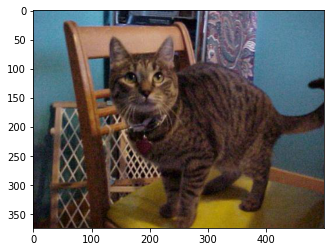

In [16]:
# Sample image - cat
cat_flist_0 = plt.imread(cat_flist[0])
plt.imshow(cat_filst_0)

In [17]:
# Constant Definition
class_label = {0:"cat", 1:"dog", 2:"panda"}
imgR = 64
imgC = 64
channel = 3

# Image Load
def load_img(flist): # path내의 모든 jpg 파일 불러오기
    img_list = []
    for file in flist:
        img = cv2.imread(file)
        img = resize(img, (imgR, imgC, channel))
        img_list.append(img)
    return np.array(img_list)

In [22]:
# Image Loading
cat_image = load_img(cat_flist)
dog_image = load_img(dog_flist)
panda_image = load_img(panda_flist)

print("cat_image: ", cat_image.shape)
print("dog_image: ", dog_image.shape)
print("panda_image: ", panda_image.shape)

cat_image:  (1000, 64, 64, 3)
dog_image:  (1000, 64, 64, 3)
panda_image:  (1000, 64, 64, 3)


In [23]:
# Image Concatenate
image = np.concatenate([cat_image, dog_image])
image = np.concatenate([image, panda_image])

In [24]:
image.shape

(3000, 64, 64, 3)

In [26]:
image

array([[[[0.65447954, 0.53417302, 0.32760695],
         [0.66791083, 0.55384378, 0.32979575],
         [0.67397914, 0.56287101, 0.32957337],
         ...,
         [0.57214899, 0.47496615, 0.30936231],
         [0.56389501, 0.46723218, 0.30761299],
         [0.55012967, 0.45341193, 0.30158319]],

        [[0.65877063, 0.53846764, 0.33187564],
         [0.66901437, 0.55394589, 0.33266536],
         [0.67331385, 0.55790809, 0.33701832],
         ...,
         [0.57002272, 0.47549034, 0.30260452],
         [0.561444  , 0.46958834, 0.29642484],
         [0.55449085, 0.45923126, 0.28607701]],

        [[0.66035721, 0.54119663, 0.33068352],
         [0.66597411, 0.55100899, 0.32955013],
         [0.67185477, 0.56321962, 0.32860917],
         ...,
         [0.56769832, 0.474273  , 0.29589299],
         [0.56014152, 0.47032297, 0.28574917],
         [0.56213823, 0.46191616, 0.28705517]],

        ...,

        [[0.08860551, 0.07940426, 0.10690042],
         [0.06751247, 0.10286547, 0.1060029 ]

In [30]:
# Image DataFrame Definition
df = pd.DataFrame(image.reshape(3000,-1), columns = np.arange(imgR*imgC*channel))
df['label'] = np.array([[0]*len(cat_image),[1]*len(dog_image),[2]*len(panda_image)]).reshape(-1)
print('df.shape :',df.shape)
df.head(2)

df.shape : (3000, 12289)


,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,label
0,0.654480,0.534173,0.327607,0.667911,0.553844,0.329796,0.673979,0.562871,0.329573,0.676316,...,0.045762,0.130461,0.199240,0.055705,0.137738,0.180233,0.114157,0.163612,0.218687,0
1,0.477402,0.393786,0.362466,0.534961,0.436170,0.414788,0.530709,0.449573,0.461864,0.557825,...,0.124090,0.123012,0.108591,0.127805,0.159907,0.188738,0.238825,0.248253,0.262203,0


In [31]:
# df.to_csv("Animal_Image_64.csv")